In [6]:
import tensorflow as tf
from keras.datasets import imdb

In [7]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Here, the imdb dataset has been pre-processed for use. Each data is a list of numbers, each number represents a unique word. 

In [9]:
import numpy as np
def vectorise_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorise_sequence(train_data)
x_test = vectorise_sequence(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

So, we have successfully converted our training data into a series of 0s and 1s (in the process of one-hot encoding), which are ready for the neural network now. We can never enter just lists of integers into a neural network, it should always be a tensor

In [11]:
x_train.shape

(25000, 10000)

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The argument we will pass to each Dense layer, 16, is the number of hidden units. Hidden units is a dimension in the representation space of a layer. Each dense layer with relu activation has the following formula:

output = relu(dot(W, input) + b)
in this case W = (input_dimension, 16) and b is the bias vector.

More units allows the model to learn more complex representations, but the process becomes more computationally extensive, and can lead to unwanted patterns.

The intermediate layers are using relu (rectified linear unit) activation, designed to zero out negative values. The final layer uses sigmoid, which squashes values into either 0 or 1.

The best loss function to use when outputting probabilities and/or when using sigmoid activation is the binary crossentropy loss. 

The optimiser we are using is the rmsprop. 


In [18]:
from keras import models, layers, losses, metrics, optimizers

model_0 = models.Sequential()
model_0.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_0.add(layers.Dense(16, activation='relu'))
model_0.add(layers.Dense(1, activation='sigmoid'))

model_0.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

We also need to create a validation data set to test the model on unseen data, amidst training.

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model_0.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 303us/step - loss: 0.5297 - accuracy: 0.7795 - val_loss: 0.3944 - val_accuracy: 0.8704
Epoch 2/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.3187 - accuracy: 0.8992 - val_loss: 0.3201 - val_accuracy: 0.8793
Epoch 3/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.2317 - accuracy: 0.9261 - val_loss: 0.2899 - val_accuracy: 0.8874
Epoch 4/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1839 - accuracy: 0.9414 - val_loss: 0.2748 - val_accuracy: 0.8913
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1462 - accuracy: 0.9545 - val_loss: 0.3456 - val_accuracy: 0.8637
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1230 - accuracy: 0.9632 - val_loss: 0.2933 - val_accuracy: 0.8853
Epoch 7/20
15000/15000 [==============================] - 2s 11

In [25]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

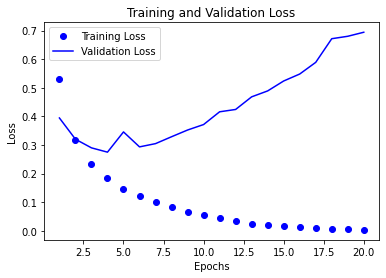

In [29]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

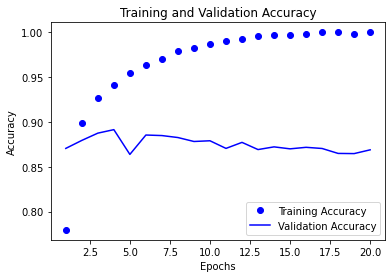

In [31]:
plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

Here, in the two graphs, we are seeing that generally as number of epochs increases, the accuracy is increasing, and the loss is decreasing. This is expected from gradient descent optimisation (rmsprop). However this trend is not followed in validation; it peaks either way at epoch 4, after which it gets worse. This is overfitting, and the model is picking up inaccurate trends in the training data, trends not present in the validation data. 

For now, we will counter this by creating the model again with only 4 epochs

In [34]:
model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model_1.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 136us/step - loss: 0.5091 - accuracy: 0.8006 - val_loss: 0.3929 - val_accuracy: 0.8646
Epoch 2/4
15000/15000 [==============================] - 1s 93us/step - loss: 0.3104 - accuracy: 0.9013 - val_loss: 0.3104 - val_accuracy: 0.8845
Epoch 3/4
15000/15000 [==============================] - 1s 93us/step - loss: 0.2300 - accuracy: 0.9248 - val_loss: 0.2804 - val_accuracy: 0.8897
Epoch 4/4
15000/15000 [==============================] - 1s 97us/step - loss: 0.1803 - accuracy: 0.9423 - val_loss: 0.2749 - val_accuracy: 0.8894


In [37]:
results = model_1.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 78us/step


[0.2936890637779236, 0.8822000026702881]

We are getting 88% accuracy. We can modify some values to improve accuracy